By- Rishabh Raj

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [ ]:
from datetime import datetime


Using isoweek to convert the date column to required format

In [ ]:
pip install isoweek

In [ ]:
from isoweek import Week

In [ ]:
df = pd.read_csv('sample.csv')

In [ ]:
df

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201513,201514,201515,201516,201517,201518,201519,201520,201521,201522,201523,201524,201525,201526,201527,201528,201529,201530,201531,201532,201533,201534,201535,201536,201537,201538,201539,201540,...,201723,201724,201725,201726,201727,201728,201729,201730,201731,201732,201733,201734,201735,201736,201737,201738,201739,201740,201741,201742,201743,201744,201745,201746,201747,201748,201749,201750,201751,201752,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810
0,11667,14976,15623,14809,16495,11980,17264,13222,7500,5539,8470,12692,10561,13827,12755,12348,13930,13793,11490,11888,10886,13723,13605,14117,13079,11727,12070,12086,14990,15438,16024,12903,14292,12595,16141,14309,14223,14519,13487,13995,...,12506,14626,12258,13917,14216,14258,14115,13553,14706,15085,15640,12899,15212,14974,13433,13158,15400,14829,8762,14707,15222,14844,13212,12632,12551,13305,12618,12106,14891,15159,11992,12461,18500,15183,16257,17749,13842,6220,4462,8741


In [ ]:
df.isnull

<bound method DataFrame.isnull of    201501  201502  201503  201504  ...  201807  201808  201809  201810
0   11667   14976   15623   14809  ...   13842    6220    4462    8741

[1 rows x 167 columns]>

In [ ]:
df.values

array([[11667, 14976, 15623, 14809, 16495, 11980, 17264, 13222,  7500,
         5539,  8470, 12692, 10561, 13827, 12755, 12348, 13930, 13793,
        11490, 11888, 10886, 13723, 13605, 14117, 13079, 11727, 12070,
        12086, 14990, 15438, 16024, 12903, 14292, 12595, 16141, 14309,
        14223, 14519, 13487, 13995,  7954, 13007, 13837, 13262, 12604,
        13062, 11575, 10945, 12544, 11587, 13366, 14699, 15586, 15006,
        14670, 13221, 15697, 16287,  8577,  2873,  8585, 11328, 12959,
        12508, 13854, 14945, 12945, 11989, 14393, 16662, 12119, 13328,
        14764, 12861, 14060, 14173, 13417, 12037, 17761, 14583, 15457,
        15086, 16020, 15197, 15537, 14639, 15620, 16458, 17168, 15739,
        17423, 17353, 13336, 14568, 16734, 18305, 15639, 16911, 15389,
        14932, 15697, 15569, 15152, 15800, 15175, 17494, 16144, 20203,
        19192,  9397,  6524, 11073, 13468, 16342, 13581, 15010, 16498,
        14641, 13212, 13720, 12784, 14939, 13926, 11628, 14160, 11630,
      

In [ ]:
#t = pd.pivot_table(data=df, index=df.columns, columns='df.values', dropna=True)

Changing rows to column

In [ ]:
df.columns.shape

(167,)

In [ ]:
df.values.shape

(1, 167)

In [ ]:
df3 = df.values.reshape(167)

In [ ]:
df3.shape

(167,)

In [ ]:
df4 = pd.Series(df.columns)

In [ ]:
df5 = pd.Series(df3)

In [ ]:
df6 = pd.concat([df4, df5], axis=1)

In [ ]:
df6.columns = ['ds', 'y']

In [ ]:
#df6.set_index('ds', inplace=True)

In [ ]:
df6.head()

,ds,y
0,201501,11667
1,201502,14976
2,201503,15623
3,201504,14809
4,201505,16495


In [ ]:
a = '201589'

In [ ]:
a[4:5]

'8'

In [ ]:
d = Week(2021,1).monday()

Splitting the year and month values to pass thru isoweek

In [ ]:
y=[]
w=[]
for val in df6['ds'].values:
  y.append(int(val[0:-2]))
  if val[4:5] != '0':
    w.append(int(val[-2:]))
  else: w.append(int(val[-1:]))
  

In [ ]:
f=[]
for i, j in zip(y, w):
  f.append(Week(i, j).sunday())


In [ ]:
df6 = pd.Series(f)

In [ ]:
df6.rename('ds', inplace=True)

0      2015-01-04
1      2015-01-11
2      2015-01-18
3      2015-01-25
4      2015-02-01
          ...    
162    2018-02-11
163    2018-02-18
164    2018-02-25
165    2018-03-04
166    2018-03-11
Name: ds, Length: 167, dtype: object

In [ ]:
df5.rename('y', inplace=True)

0      11667
1      14976
2      15623
3      14809
4      16495
       ...  
162    17749
163    13842
164     6220
165     4462
166     8741
Name: y, Length: 167, dtype: int64

In [ ]:
df7 = pd.concat([df6, df5], axis=1)

1st part **answer**

In [ ]:
df7

,ds,y
0,2015-01-04,11667
1,2015-01-11,14976
2,2015-01-18,15623
3,2015-01-25,14809
4,2015-02-01,16495
...,...,...
162,2018-02-11,17749
163,2018-02-18,13842
164,2018-02-25,6220
165,2018-03-04,4462


Analyzing the data

In [ ]:
df10 = df7

In [ ]:
df7['ds'] = pd.to_datetime(df7['ds'])

In [ ]:
df7['month'] = df7['ds'].dt.month_name()

In [ ]:
df7['year'] = df7['ds'].dt.year

In [ ]:
df7.head()

,ds,y,month,year
0,2015-01-04,11667,January,2015
1,2015-01-11,14976,January,2015
2,2015-01-18,15623,January,2015
3,2015-01-25,14809,January,2015
4,2015-02-01,16495,February,2015


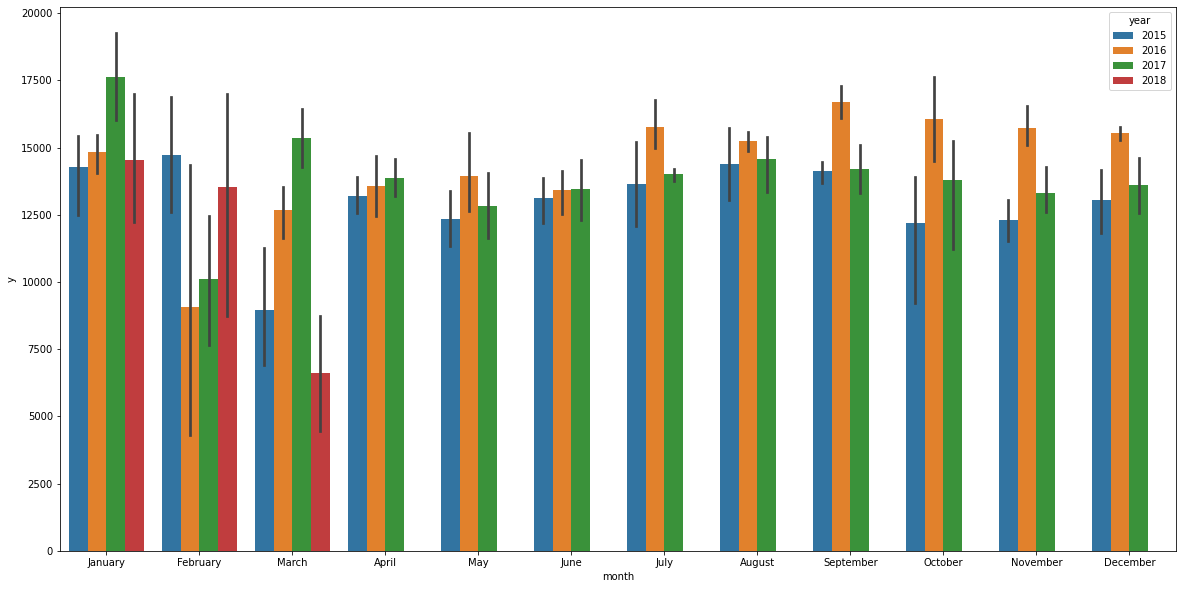

In [ ]:
fig = plt.gcf();
fig.set_size_inches(20, 10)
sns.barplot(x=df7['month'], y=df7['y'], hue=df7['year']);

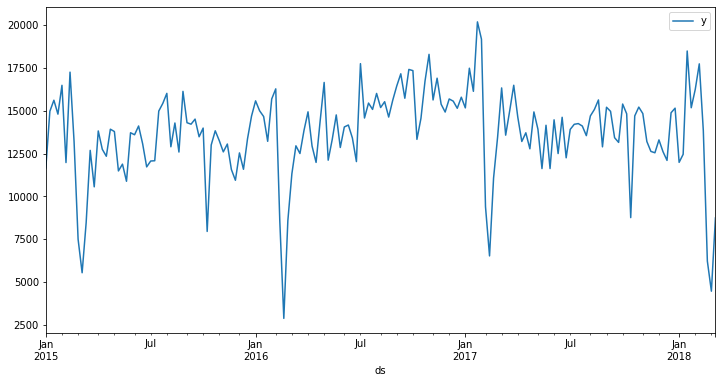

In [ ]:
ax = df7.plot(x='ds', y='y', figsize=(12,6))

The plot reaches a minimum during march of every year

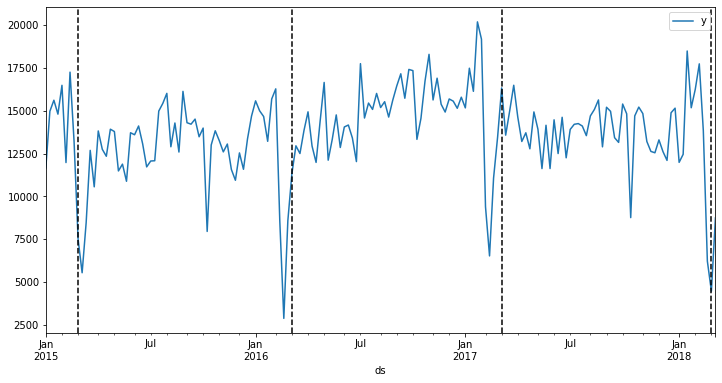

In [ ]:
ax = df7.plot(x='ds', y='y', figsize=(12,6))
xcoords = ['2015-03-01', '2016-03-01','2017-03-01', '2018-03-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [ ]:
df8 = df7.copy()

Decompose Time-Series to see Individual Components

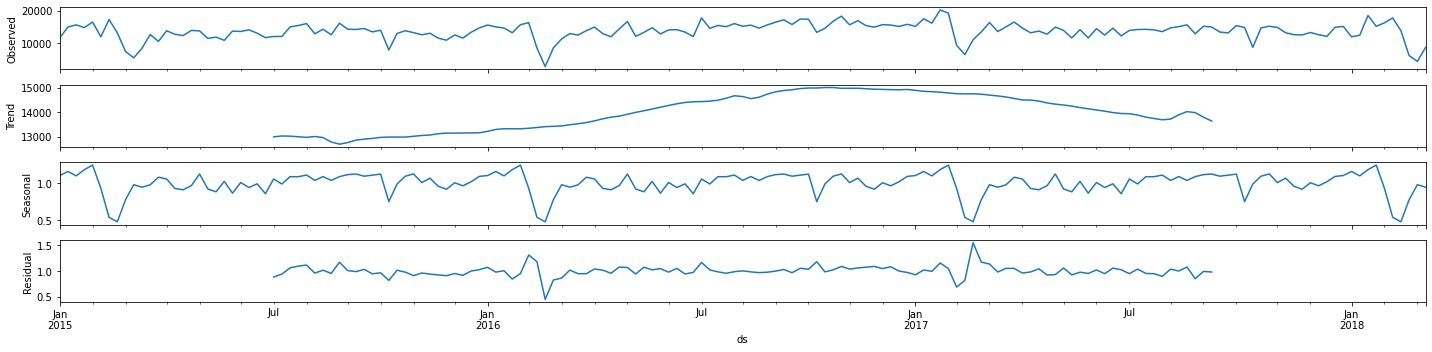

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df8.set_index('ds', inplace=True)

analysis = df8[['y']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid


fig = decompose_result_mult.plot()
matplotlib.rcParams['figure.figsize'] = [20, 5];

In [ ]:
df7

,ds,y,month,year
0,2015-01-04,11667,January,2015
1,2015-01-11,14976,January,2015
2,2015-01-18,15623,January,2015
3,2015-01-25,14809,January,2015
4,2015-02-01,16495,February,2015
...,...,...,...,...
162,2018-02-11,17749,February,2018
163,2018-02-18,13842,February,2018
164,2018-02-25,6220,February,2018
165,2018-03-04,4462,March,2018


In [ ]:
data = df7.drop(['month', 'year'], axis=1)

In [ ]:
data = data.set_index('ds')

In [ ]:
data.head()

,y
ds,
2015-01-04,11667
2015-01-11,14976
2015-01-18,15623
2015-01-25,14809
2015-02-01,16495


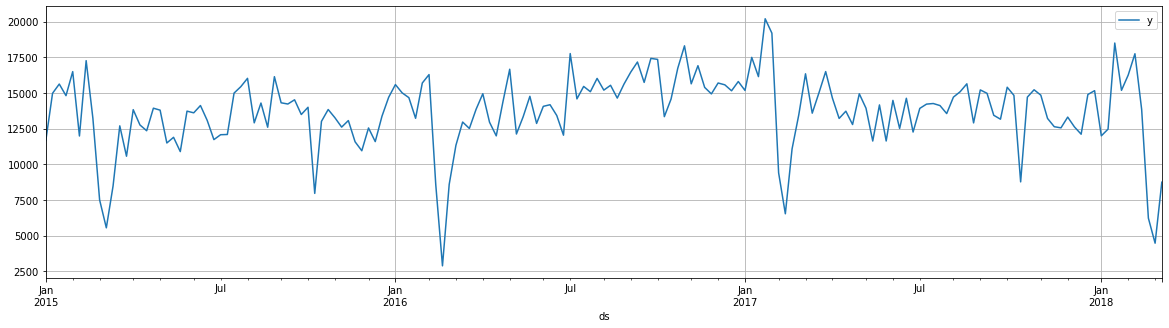

In [ ]:
data.plot(grid=True)

Using Facebook Prophet library for time series forecasting

In [ ]:
import fbprophet

In [ ]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
data2 = df7.drop(['month', 'year'], axis=1)

In [ ]:
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(data2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 2016-01-01  14160.363636  11780.977614  16732.367686
1 2016-02-01  15714.690444  13321.097264  18228.131145
2 2016-03-01   9009.530612   6421.848716  11293.340343
3 2016-04-01  13935.907343  11283.334994  16485.644411
4 2016-05-01  14175.246972  11573.253354  16629.882594


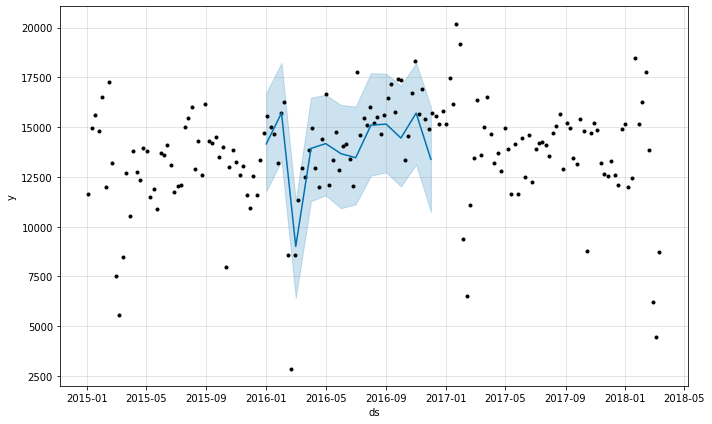

In [ ]:
future = list()
for i in range(1, 13):
	date = '2016-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast1 = model.predict(future)
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast1)
plt.show()

In [ ]:
forecast1.shape

(12, 16)

In [ ]:
f = model.predict(data2)

In [ ]:
f.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,12784.071270,10928.900483,16007.552083,12784.071270,12784.071270,745.149857,745.149857,745.149857,745.149857,745.149857,745.149857,0.0,0.0,0.0,13529.221127
1,2015-01-11,12800.319115,11683.731621,16725.578397,12800.319115,12800.319115,1463.591023,1463.591023,1463.591023,1463.591023,1463.591023,1463.591023,0.0,0.0,0.0,14263.910138
2,2015-01-18,12816.566960,12563.298642,17410.667004,12816.566960,12816.566960,2249.613466,2249.613466,2249.613466,2249.613466,2249.613466,2249.613466,0.0,0.0,0.0,15066.180427
3,2015-01-25,12832.814806,12847.289938,17910.184382,12832.814806,12832.814806,2574.062703,2574.062703,2574.062703,2574.062703,2574.062703,2574.062703,0.0,0.0,0.0,15406.877509
4,2015-02-01,12849.062651,12364.732639,17260.074572,12849.062651,12849.062651,1978.423372,1978.423372,1978.423372,1978.423372,1978.423372,1978.423372,0.0,0.0,0.0,14827.486023


In [ ]:
data2.tail()

,ds,y
162,2018-02-11,17749
163,2018-02-18,13842
164,2018-02-25,6220
165,2018-03-04,4462
166,2018-03-11,8741


          ds          yhat    yhat_lower    yhat_upper
0 2018-04-01  13708.895357  11339.172666  16283.325153
1 2018-05-01  13804.066692  11254.301685  16206.207286
2 2018-06-01  13106.287363  10507.696496  15600.931814
3 2018-07-01  12803.935130  10291.505790  15294.195480
4 2018-08-01  14361.995377  11793.437574  16885.199784


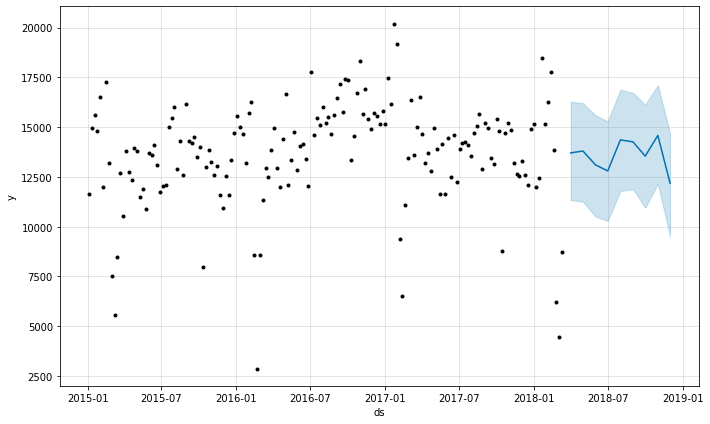

In [ ]:
future = list()
for i in range(4, 13):
	date = '2018-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast2 = model.predict(future)
# summarize the forecast
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast2)
plt.show()

          ds          yhat    yhat_lower    yhat_upper
0 2018-04-01  13708.895357  11027.844175  16215.872063
1 2018-05-01  13804.066692  11237.987066  16183.633628
2 2018-06-01  13106.287363  10444.669402  15439.593254
3 2018-07-01  12803.935130  10163.234789  15372.547032
4 2018-08-01  14361.995377  11690.032741  16861.228486


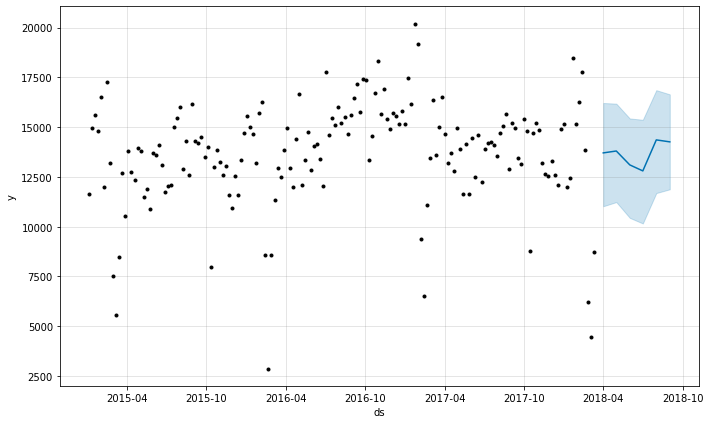

In [ ]:
future = list()
for i in range(4, 10):
	date = '2018-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast3 = model.predict(future)
# summarize the forecast
print(forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast3)
plt.show()

MAE: 3537.963


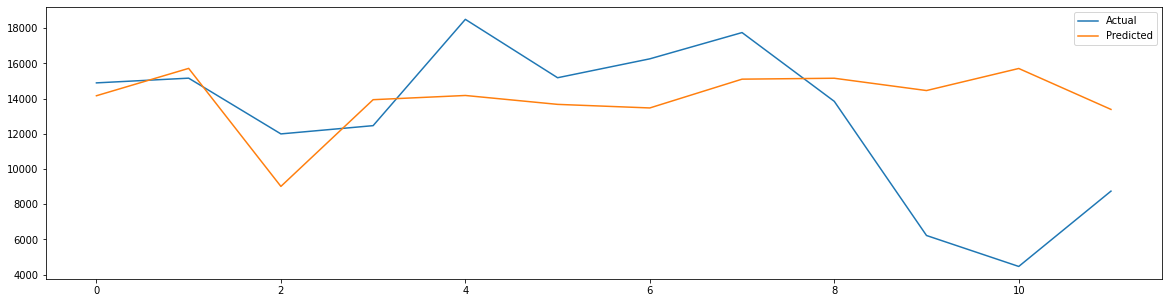

In [ ]:
from sklearn.metrics import mean_absolute_error
future = list()
for i in range(1, 13):
	date = '2016-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = data2['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Final prediction graph

MAE: 1407.034


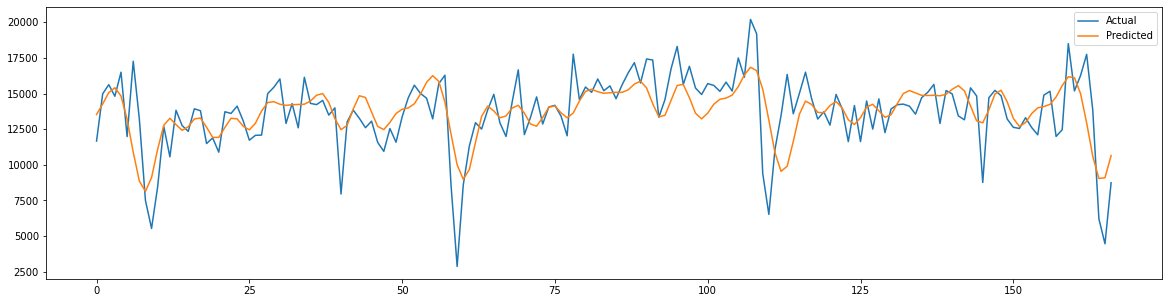

In [ ]:
from sklearn.metrics import mean_absolute_error

# use the model to make a forecast
forecast = model.predict(data2)
# calculate MAE between expected and predicted values for december
y_true = data2['y'][-167:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
f.shape

(167, 16)

In [ ]:
forecast3.shape

(6, 16)

In [ ]:
df_1 = pd.concat([f, forecast])

In [ ]:
df_1.shape

(176, 16)

1st Dataframe for 2nd part of the assignment

In [ ]:
df_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,12784.071270,10928.900483,16007.552083,12784.071270,12784.071270,745.149857,745.149857,745.149857,745.149857,745.149857,745.149857,0.0,0.0,0.0,13529.221127
1,2015-01-11,12800.319115,11683.731621,16725.578397,12800.319115,12800.319115,1463.591023,1463.591023,1463.591023,1463.591023,1463.591023,1463.591023,0.0,0.0,0.0,14263.910138
2,2015-01-18,12816.566960,12563.298642,17410.667004,12816.566960,12816.566960,2249.613466,2249.613466,2249.613466,2249.613466,2249.613466,2249.613466,0.0,0.0,0.0,15066.180427
3,2015-01-25,12832.814806,12847.289938,17910.184382,12832.814806,12832.814806,2574.062703,2574.062703,2574.062703,2574.062703,2574.062703,2574.062703,0.0,0.0,0.0,15406.877509
4,2015-02-01,12849.062651,12364.732639,17260.074572,12849.062651,12849.062651,1978.423372,1978.423372,1978.423372,1978.423372,1978.423372,1978.423372,0.0,0.0,0.0,14827.486023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-08-01,13364.497574,11878.671143,17010.804845,13328.187402,13401.890421,997.497803,997.497803,997.497803,997.497803,997.497803,997.497803,0.0,0.0,0.0,14361.995377
5,2018-09-01,13311.686833,11799.167085,16892.647514,13263.244386,13362.582612,951.515783,951.515783,951.515783,951.515783,951.515783,951.515783,0.0,0.0,0.0,14263.202617
6,2018-10-01,13260.579665,11106.072181,16081.688626,13197.588452,13326.011482,285.949618,285.949618,285.949618,285.949618,285.949618,285.949618,0.0,0.0,0.0,13546.529283
7,2018-11-01,13207.768924,12099.592862,17029.474127,13129.658322,13288.076770,1378.622525,1378.622525,1378.622525,1378.622525,1378.622525,1378.622525,0.0,0.0,0.0,14586.391448


In [ ]:
df_2 = df_1[['ds', 'yhat']]

In [ ]:
df_2.head()

,ds,y
0,2015-01-04,13529.221127
1,2015-01-11,14263.910138
2,2015-01-18,15066.180427
3,2015-01-25,15406.877509
4,2015-02-01,14827.486023


In [ ]:
df_2.columns = ['ds', 'y']

Removing seasonality and trend 

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
data3 = pd.Series(data['y'], index=data.index)

In [ ]:
data3

ds
2015-01-04    11667
2015-01-11    14976
2015-01-18    15623
2015-01-25    14809
2015-02-01    16495
              ...  
2018-02-11    17749
2018-02-18    13842
2018-02-25     6220
2018-03-04     4462
2018-03-11     8741
Name: y, Length: 167, dtype: int64

test statistic is less than critical values --->> stationary

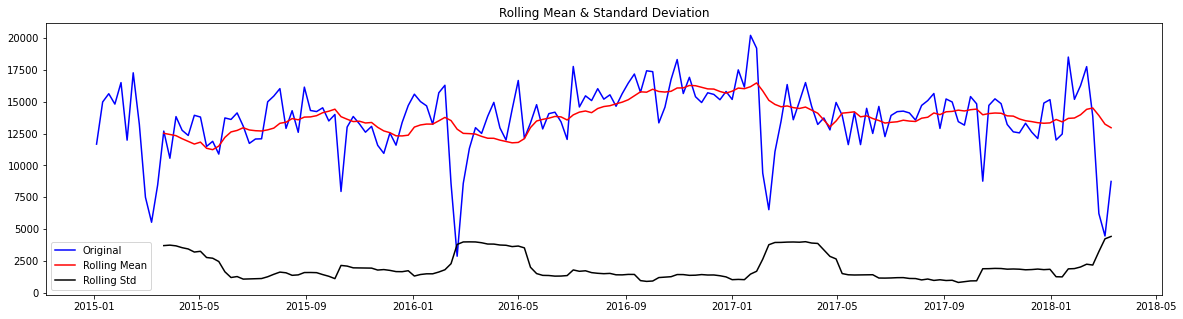

Results of Dickey-Fuller Test:
Test Statistic                -6.826274e+00
p-value                        1.944270e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.650000e+02
Critical Value (1%)           -3.470616e+00
Critical Value (5%)           -2.879221e+00
Critical Value (10%)          -2.576197e+00
dtype: float64


In [ ]:
test_stationarity(data3)

Trying to obtain an even more stationary graph

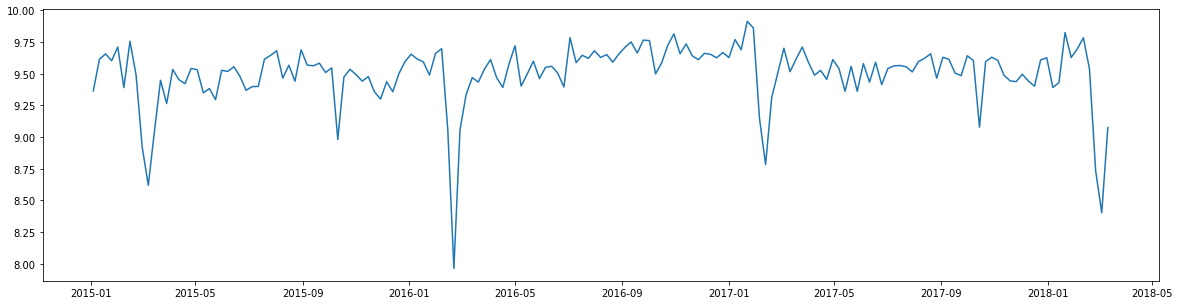

In [ ]:
data_log = np.log(data3)
plt.plot(data_log);

Differencing

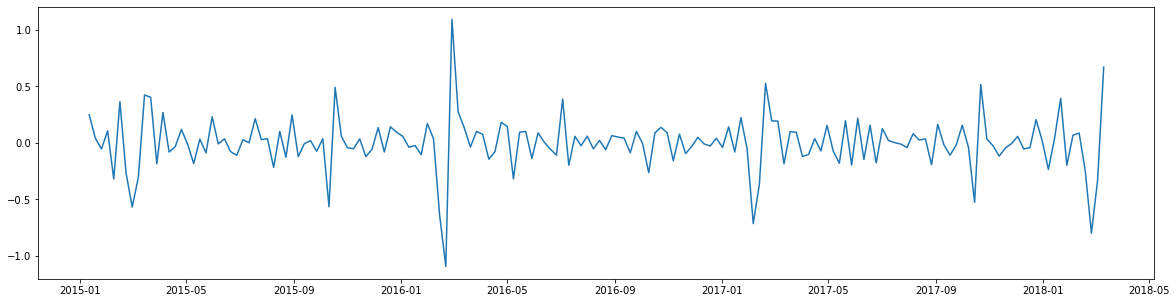

In [ ]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff);

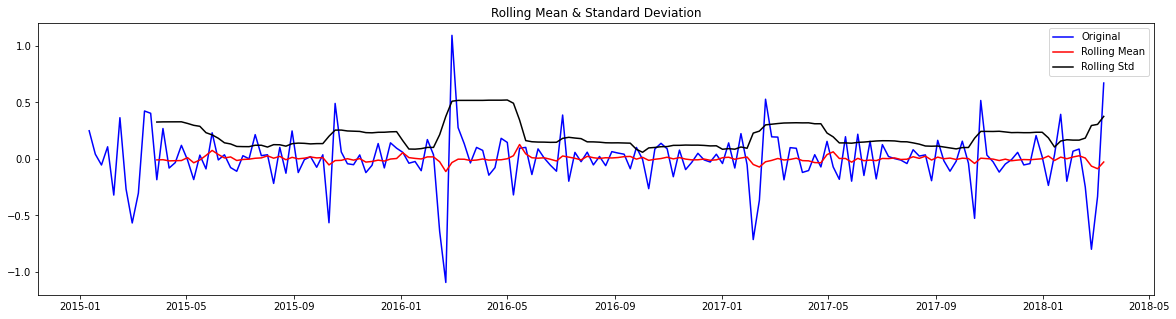

Results of Dickey-Fuller Test:
Test Statistic                -6.968836e+00
p-value                        8.771391e-10
#Lags Used                     9.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64


In [ ]:
data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff);

Decomposing

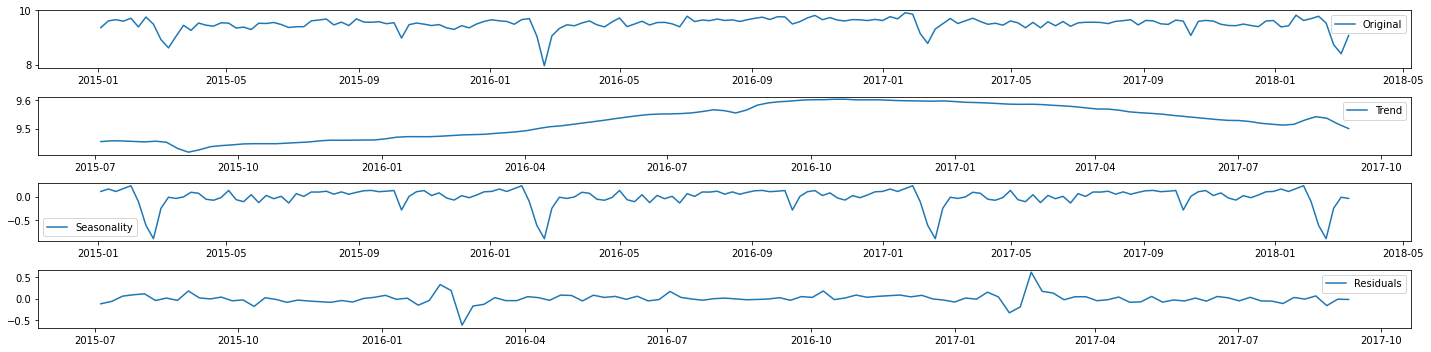

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In this graph the test statistics value is really less than the crictical values. Therefore this graph is highly stationary

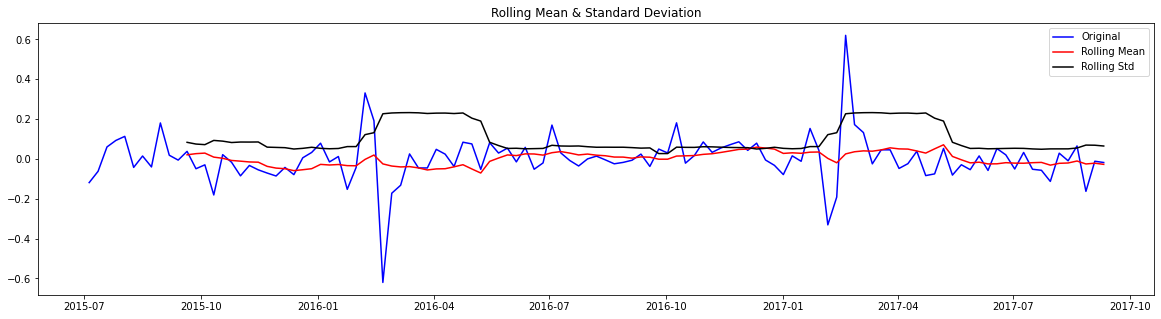

Results of Dickey-Fuller Test:
Test Statistic                -9.075421e+00
p-value                        4.192006e-15
#Lags Used                     1.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


In [ ]:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

Obtaining the 2nd dataframe required in the assignment

In [ ]:
data_log_decompose

ds
2015-07-05   -0.119239
2015-07-12   -0.062402
2015-07-19    0.059919
2015-07-26    0.092694
2015-08-02    0.113066
                ...   
2017-08-13   -0.009679
2017-08-20    0.064853
2017-08-27   -0.163081
2017-09-03   -0.011769
2017-09-10   -0.018224
Name: y, Length: 115, dtype: float64

In [ ]:
data4 = pd.DataFrame({'ds':data_log_decompose.index, 'y':data_log_decompose.values})

In [ ]:
data4

,ds,y
0,2015-07-05,-0.119239
1,2015-07-12,-0.062402
2,2015-07-19,0.059919
3,2015-07-26,0.092694
4,2015-08-02,0.113066
...,...,...
110,2017-08-13,-0.009679
111,2017-08-20,0.064853
112,2017-08-27,-0.163081
113,2017-09-03,-0.011769


In [ ]:
forecast4 = forecast3[['ds', 'yhat']]

In [ ]:
forecast4.columns = ['ds', 'y']

In [ ]:
df_final2 = pd.concat([data4, forecast4])

In [ ]:
for i in df_final2['y'][-5:].values:
  df_final2['y'] = df_final2['y'].replace(i ,np.NaN)

In [ ]:
df_final2

,ds,y
0,2015-07-05,-0.119239
1,2015-07-12,-0.062402
2,2015-07-19,0.059919
3,2015-07-26,0.092694
4,2015-08-02,0.113066
...,...,...
1,2018-05-01,NaN
2,2018-06-01,NaN
3,2018-07-01,NaN
4,2018-08-01,NaN
